## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
import os
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets")
sys.path.append(os.path.realpath(".."))
sys.path.append(os.path.realpath("../GetOldTweets"))
print(sys.path)

['/home/accts/jcf73/thesis/deeptrader/examples', '/home/accts/jcf73/thesis/venv/lib64/python37.zip', '/home/accts/jcf73/thesis/venv/lib64/python3.7', '/home/accts/jcf73/thesis/venv/lib64/python3.7/lib-dynload', '/usr/lib64/python3.7', '/usr/lib/python3.7', '', '/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages', '/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/IPython/extensions', '/home/accts/jcf73/.ipython', '/home/accts/jcf73/thesis/deeptrader', '/home/accts/jcf73/thesis/deeptrader/GetOldTweets']


## Fetch the Labeled PredictIt Data  
Adds ALL TA features at first. Also creates the "price_norm" metric which is close/open.

In [2]:
import ssl
import pandas as pd
import ta
from datetime import datetime, timedelta

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "../predictit_datasets/"
    filename = "{}_labeled.csv".format(symbol)

    df = pd.read_csv(path + filename)
    
    df = df.set_index("Date")


    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW"),
    fetch_data("KNIGHT"),
    fetch_data("MCCASKILL"),
    fetch_data("BALDWIN"),
    fetch_data("DENHAM"),
    fetch_data("HEITKAMP"),
    fetch_data("TESTER"),
    fetch_data("HURD"),
    fetch_data("HEINRICH"),
    fetch_data("MENENDEZ")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:current_date,WARREN:sentiment,WARREN:volume_adi,...,MENENDEZ:momentum_uo,MENENDEZ:momentum_stoch,MENENDEZ:momentum_stoch_signal,MENENDEZ:momentum_wr,MENENDEZ:momentum_ao,MENENDEZ:momentum_kama,MENENDEZ:momentum_roc,MENENDEZ:others_dr,MENENDEZ:others_dlr,MENENDEZ:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.81,0.79,0.82,0.80,768,0.8067,0.987654,2017-02-01,0.04693,-256.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,-4.508748,NaN,0.0
2017-02-02,0.80,0.79,0.80,0.79,50,0.7996,0.987500,2017-02-02,0.05167,-306.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-03,0.79,0.78,0.80,0.78,592,0.7813,0.987342,2017-02-03,0.07868,-898.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-04,0.78,0.78,0.79,0.79,10,0.7900,1.012821,2017-02-04,0.14822,-888.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-05,0.79,0.79,0.80,0.80,6,0.7950,1.012658,2017-02-05,-0.01526,-882.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0


## Plot the closing prices for all the markets

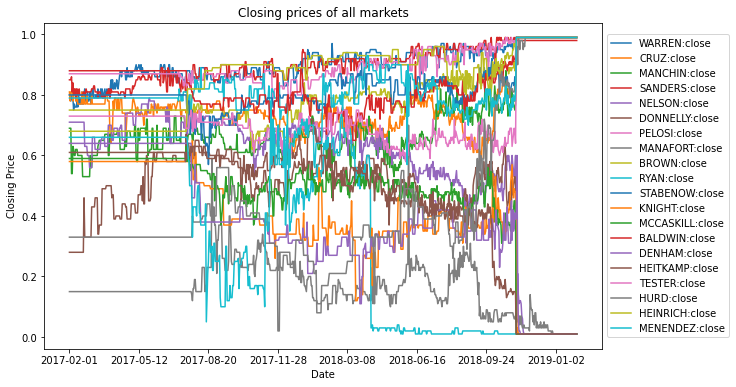

In [4]:
import matplotlib.pyplot as plt
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [5]:
#Copy it over cause of variable names
subset_data = all_data

## Define The Exchange

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [6]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close'])),
    Stream("USD-KNIGHT", list(subset_data['KNIGHT:close'])),
    Stream("USD-MCCASKILL", list(subset_data['MCCASKILL:close'])),
    Stream("USD-BALDWIN", list(subset_data['BALDWIN:close'])),
    Stream("USD-DENHAM", list(subset_data['DENHAM:close'])),
    Stream("USD-HEITKAMP", list(subset_data['HEITKAMP:close'])),
    Stream("USD-TESTER", list(subset_data['TESTER:close'])),
    Stream("USD-HURD", list(subset_data['HURD:close'])),
    Stream("USD-HEINRICH", list(subset_data['HEINRICH:close'])),
    Stream("USD-MENENDEZ", list(subset_data['MENENDEZ:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define the "Portfolio"

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [7]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW, KNIGHT, MCCASKILL, \
                                BALDWIN, DENHAM, HEITKAMP, TESTER, HURD, HEINRICH, MENENDEZ
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 100000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW),
    Wallet(predictit_exch, 0 * KNIGHT),
    Wallet(predictit_exch, 0 * MCCASKILL),
    Wallet(predictit_exch, 0 * BALDWIN),
    Wallet(predictit_exch, 0 * DENHAM),
    Wallet(predictit_exch, 0 * HEITKAMP),
    Wallet(predictit_exch, 0 * TESTER),
    Wallet(predictit_exch, 0 * HURD),
    Wallet(predictit_exch, 0 * HEINRICH),
    Wallet(predictit_exch, 0 * MENENDEZ)
])

## Create a feature dataframe that specifies custom features

In [8]:
#Select only the TA features to keep
features_to_keep = ["close", "sentiment", "volume", "trend_cci", "momentum_rsi"]
feature_data = subset_data.loc[:, [(any(word in name for word in features_to_keep)) for name in subset_data.columns]]

#Remove any extra volume columns
feature_data = feature_data[feature_data.columns.drop(list(feature_data.filter(regex='volume_')))]

feature_data

,WARREN:close,WARREN:volume,WARREN:sentiment,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:close,CRUZ:volume,CRUZ:sentiment,CRUZ:trend_cci,CRUZ:momentum_rsi,...,HEINRICH:close,HEINRICH:volume,HEINRICH:sentiment,HEINRICH:trend_cci,HEINRICH:momentum_rsi,MENENDEZ:close,MENENDEZ:volume,MENENDEZ:sentiment,MENENDEZ:trend_cci,MENENDEZ:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.80,768,0.04693,NaN,100.000000,0.81,1411,0.21082,NaN,100.000000,...,0.75,0,0.24841,NaN,100.000000,0.66,0,0.036070,NaN,100.000000
2017-02-02,0.79,50,0.05167,-66.666667,0.000000,0.78,924,0.06047,-66.666667,0.000000,...,0.75,0,0.43215,NaN,100.000000,0.66,0,-0.033775,NaN,100.000000
2017-02-03,0.78,592,0.07868,-87.500000,0.000000,0.81,25,0.14213,-33.333333,51.851852,...,0.75,0,0.03893,NaN,100.000000,0.66,0,0.011211,NaN,100.000000
2017-02-04,0.79,10,0.14822,-66.666667,35.831810,0.81,27,-0.05324,-30.769231,51.851852,...,0.75,0,0.01821,NaN,100.000000,0.66,0,0.000000,NaN,100.000000
2017-02-05,0.80,6,-0.01526,41.666667,53.698630,0.81,1,-0.12315,27.027027,51.851852,...,0.75,0,0.11472,NaN,100.000000,0.66,0,0.013943,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,0.99,0,-0.20105,166.666667,62.938371,0.99,0,0.17329,-166.666667,82.765969,...,0.99,0,-0.32189,600.0,68.170813,0.99,0,0.088950,333.333333,71.912774
2019-01-29,0.99,0,0.24873,166.666667,62.938371,0.99,0,-0.23346,-166.666667,82.765969,...,0.99,0,-0.23839,600.0,68.170813,0.99,0,-0.132570,333.333333,71.912774
2019-01-30,0.99,0,-0.04311,166.666667,62.938371,0.99,0,-0.04381,-166.666667,82.765969,...,0.99,0,0.02141,600.0,68.170813,0.99,0,-0.229600,333.333333,71.912774


In [9]:
#Make the time series stationary
import numpy as np

def get_log_and_diff(df, features):
    new_df = pd.DataFrame()

    #First handle close prices
    close_cols = [name for name in df.columns if any(word in name for word in ["close"]) ]
    for col in close_cols:
        new_df[col+"_diff"] = np.log(df[col]) - np.log(df[col].shift(1))

    cols_to_norm = [name for name in df.columns if any(word in name for word in features) ]
    for col in cols_to_norm:
        new_df[col+"_diff"] = df[col] - df[col].shift(1)

    return new_df
    

feature_data = get_log_and_diff(feature_data, ["volume", "sentiment", "trend_cci", "momentum_rsi"])


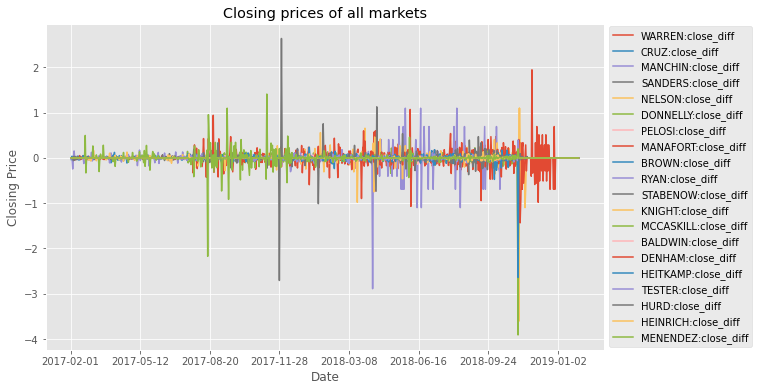

In [10]:
#Print the stationary prices.
closing_prices = feature_data.loc[:, [("close" in name) for name in feature_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [11]:
#Replace all inf and -inf (which are in the trend_cci column) with Nan
import numpy as np
feature_data = feature_data.replace([np.inf, -np.inf, np.nan], 0)

In [12]:
#Normalize the technical features
features_to_norm = ["volume", "trend_cci", "momentum_rsi"]
cols_to_norm = [name for name in feature_data.columns if any(word in name for word in features_to_norm) ]
#feature_data[cols_to_norm] = feature_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

from sklearn.preprocessing import StandardScaler
feature_data[cols_to_norm] = StandardScaler().fit_transform(feature_data[cols_to_norm])

#Fill any Nan in trend CCI with zeroes. (Do this AFTER normalization)
feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]] = feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]].fillna(value=0)


feature_data.head()

,WARREN:close_diff,CRUZ:close_diff,MANCHIN:close_diff,SANDERS:close_diff,NELSON:close_diff,DONNELLY:close_diff,PELOSI:close_diff,MANAFORT:close_diff,BROWN:close_diff,RYAN:close_diff,...,HURD:trend_cci_diff,HURD:momentum_rsi_diff,HEINRICH:volume_diff,HEINRICH:sentiment_diff,HEINRICH:trend_cci_diff,HEINRICH:momentum_rsi_diff,MENENDEZ:volume_diff,MENENDEZ:sentiment_diff,MENENDEZ:trend_cci_diff,MENENDEZ:momentum_rsi_diff
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.00000,-0.011833,0.005665,0.0,0.000000,-0.002344,0.005679
2017-02-02,-0.012579,-0.03774,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.18374,-0.011833,0.005665,0.0,-0.069845,-0.002344,0.005679
2017-02-03,-0.012739,0.03774,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,-0.39322,-0.011833,0.005665,0.0,0.044986,-0.002344,0.005679
2017-02-04,0.012739,0.00000,-0.245122,0.011696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,-0.02072,-0.011833,0.005665,0.0,-0.011211,-0.002344,0.005679
2017-02-05,0.012579,0.00000,0.000000,-0.059898,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.09651,-0.011833,0.005665,0.0,0.013943,-0.002344,0.005679


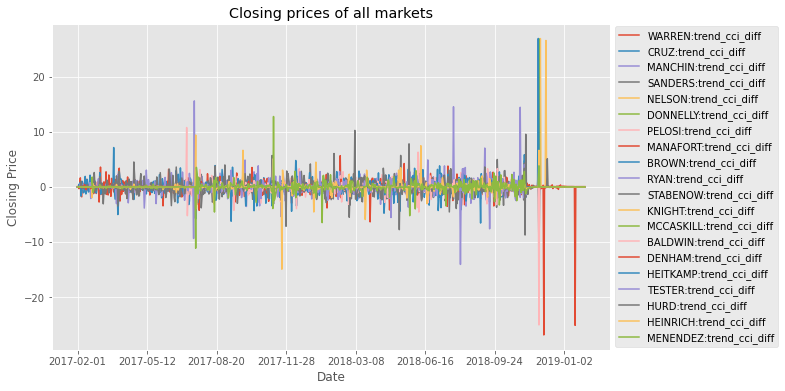

In [13]:
#Plot again
to_plot = feature_data.loc[:, [("cci" in name) for name in feature_data.columns]]
to_plot.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

## Split into train and test data

In [14]:
train_data = feature_data[(pd.to_datetime(feature_data.index)>= '02-01-2017') & (pd.to_datetime(feature_data.index) <= '08-01-2018')]
train_data.head(3)

,WARREN:close_diff,CRUZ:close_diff,MANCHIN:close_diff,SANDERS:close_diff,NELSON:close_diff,DONNELLY:close_diff,PELOSI:close_diff,MANAFORT:close_diff,BROWN:close_diff,RYAN:close_diff,...,HURD:trend_cci_diff,HURD:momentum_rsi_diff,HEINRICH:volume_diff,HEINRICH:sentiment_diff,HEINRICH:trend_cci_diff,HEINRICH:momentum_rsi_diff,MENENDEZ:volume_diff,MENENDEZ:sentiment_diff,MENENDEZ:trend_cci_diff,MENENDEZ:momentum_rsi_diff
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.00000,-0.011833,0.005665,0.0,0.000000,-0.002344,0.005679
2017-02-02,-0.012579,-0.03774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.18374,-0.011833,0.005665,0.0,-0.069845,-0.002344,0.005679
2017-02-03,-0.012739,0.03774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,-0.39322,-0.011833,0.005665,0.0,0.044986,-0.002344,0.005679


In [15]:
test_data = feature_data[(pd.to_datetime(feature_data.index) >= '08-02-2018') & (pd.to_datetime(feature_data.index) <= '11-01-2018')]
test_data.head(3)

,WARREN:close_diff,CRUZ:close_diff,MANCHIN:close_diff,SANDERS:close_diff,NELSON:close_diff,DONNELLY:close_diff,PELOSI:close_diff,MANAFORT:close_diff,BROWN:close_diff,RYAN:close_diff,...,HURD:trend_cci_diff,HURD:momentum_rsi_diff,HEINRICH:volume_diff,HEINRICH:sentiment_diff,HEINRICH:trend_cci_diff,HEINRICH:momentum_rsi_diff,MENENDEZ:volume_diff,MENENDEZ:sentiment_diff,MENENDEZ:trend_cci_diff,MENENDEZ:momentum_rsi_diff
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-02,0.000000,-0.028171,0.012579,0.0,-0.019048,0.108214,-0.01105,-0.344840,0.000000,0.0,...,0.608340,0.007581,0.0,0.13148,0.410237,0.005665,0.023595,0.27210,-0.674715,-0.623374
2018-08-03,0.010471,0.014185,-0.012579,0.0,0.000000,0.000000,0.00000,0.211309,0.000000,0.0,...,0.278707,-1.001663,0.0,0.11967,0.268253,0.005665,0.009295,-0.29159,-0.310229,0.005679
2018-08-04,-0.021053,0.013986,-0.038715,0.0,-0.039221,0.025318,0.00000,0.000000,0.011834,0.0,...,0.655166,0.007581,0.0,-0.38118,0.186140,0.005665,-0.049097,-0.05636,1.377321,1.035362


### Now make the "External Data Feed" objects

In [16]:
#Add "Streams" for all my external added features.
from tensortrade.data import DataFeed, Module

#Do it for train set
with Module("predictit") as train_predictit_ns:
    train_predictit_nodes = [Stream(name, list(train_data[name])) for name in train_data.columns]
    
#Now do it for test set
with Module("predictit") as test_predictit_ns:
    test_predictit_nodes = [Stream(name, list(test_data[name])) for name in test_data.columns]

In [17]:
#Then create the train Feed from it
train_external_feed = DataFeed([train_predictit_ns])
test_external_feed = DataFeed([test_predictit_ns])
train_external_feed.next()

{'predictit:/WARREN:close_diff': 0.0,
 'predictit:/CRUZ:close_diff': 0.0,
 'predictit:/MANCHIN:close_diff': 0.0,
 'predictit:/SANDERS:close_diff': 0.0,
 'predictit:/NELSON:close_diff': 0.0,
 'predictit:/DONNELLY:close_diff': 0.0,
 'predictit:/PELOSI:close_diff': 0.0,
 'predictit:/MANAFORT:close_diff': 0.0,
 'predictit:/BROWN:close_diff': 0.0,
 'predictit:/RYAN:close_diff': 0.0,
 'predictit:/STABENOW:close_diff': 0.0,
 'predictit:/KNIGHT:close_diff': 0.0,
 'predictit:/MCCASKILL:close_diff': 0.0,
 'predictit:/BALDWIN:close_diff': 0.0,
 'predictit:/DENHAM:close_diff': 0.0,
 'predictit:/HEITKAMP:close_diff': 0.0,
 'predictit:/TESTER:close_diff': 0.0,
 'predictit:/HURD:close_diff': 0.0,
 'predictit:/HEINRICH:close_diff': 0.0,
 'predictit:/MENENDEZ:close_diff': 0.0,
 'predictit:/WARREN:volume_diff': 0.0007819890389761158,
 'predictit:/WARREN:sentiment_diff': 0.0,
 'predictit:/WARREN:trend_cci_diff': -0.0048507814974368055,
 'predictit:/WARREN:momentum_rsi_diff': 0.006612971143076447,
 'predi

## First Launch Ray. 
This is where you define our training "Trading Enviroment," which includes things such as the action scheme, the reward scheme, the window size, and whether or not to use the "interal feed" (internal data feed has all the price data from the wallets and the networth of the portfolio).

In [18]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = os.path.realpath("..")
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [19]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [20]:
# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=train_external_feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="diversified",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog',
            use_internal = False,
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


#ray.init(ignore_reinit_error=True, local_mode=True)

## Train using Tune

In [21]:
#Implement Custom neural network model
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.agents.dqn.distributional_q_model import DistributionalQModel
from ray.rllib.utils import try_import_tf

from ray.rllib.models.tf.fcnet_v2 import FullyConnectedNetwork

from gym.spaces import Box

tf = try_import_tf()

class CNNModel(DistributionalQModel, TFModelV2):
    """Custom model for DQN."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name, **kw):
        super(CNNModel, self).__init__(
            obs_space, action_space, num_outputs, model_config, name, **kw)

        # Define neural net layers
        self.base_model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(15, 121)),
            tf.keras.layers.Conv1D(filters=40, kernel_size=6, padding="same", activation="relu"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Conv1D(filters=20, kernel_size=3, padding="same", activation="relu"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_outputs, activation="softmax")
        ])
        
        self.register_variables(self.base_model.variables)

    # Implement the core forward method
    def forward(self, input_dict, state, seq_lens):
        model_out = self.base_model(input_dict["obs"]["real_obs"])
        
        action_mask = input_dict["obs"]["action_mask"]
        inf_mask = tf.maximum(tf.log(action_mask), tf.float32.min)
        
        
        return model_out + inf_mask, state

    
ModelCatalog.register_custom_model("cnn_model", CNNModel)

In [22]:
# Population based training
from ray.tune.schedulers import PopulationBasedTraining
import random

pbt = PopulationBasedTraining(
    time_attr="time_total_s",
    metric="episode_reward_mean",
    mode="max",
    perturbation_interval=240, #Every 10,000 steps, consider changing learning rate
    hyperparam_mutations={
        #"lr": lambda: random.uniform(.00001, .01),
        #"epsilon_timesteps": lambda: random.uniform(10000, 100000)
        "train_batch_size": lambda: random.uniform(10, 1000),
    } 
)

In [23]:
%load_ext autoreload
%autoreload 2

In [ ]:
analysis = tune.run(
        "DQN",
        name = "DQN57-actions_mask",
        #scheduler=pbt, #Use Population Based Training
        #num_samples=4, #Number of different hyperparameters to sample
        #reuse_actors=True,
        #restore = "/home/accts/jcf73/ray_results/DQN57-actions_mask/DQN_ray_trading_env_cbfaadba_0_2020-04-20_13-53-090zljysq7/checkpoint_250/checkpoint-250",
        checkpoint_freq = 50,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 10000000,
        },
        config={
            "env": "ray_trading_env",
            "lr": .0001,  # try different lrs
            "num_workers": 18,  # parallelism,
            #"num_gpus": 1,
            #"eager": "true",
            "model": {
                "custom_model": "cnn_model"
            },
            "exploration_config": {
                "initial_epsilon": 0.85,
                "epsilon_timesteps": 3100000,
                
            },
            "train_batch_size": 100,
            #"clip_rewards": True,
            #"grad_norm_clipping": None,
            "target_network_update_freq": 3000,
            "dueling": False,
            "hiddens": [],
        },
        
    )

2020-04-20 20:09:06,428	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-04-20 20:09:06,430	INFO resource_spec.py:212 -- Starting Ray with 34.57 GiB memory available for workers and up to 17.3 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-04-20 20:09:07,398	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


Trial name,status,loc
DQN_ray_trading_env_5186fcde,RUNNING,


(pid=24648) 2020-04-20 20:09:29,317	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=24648) 2020-04-20 20:09:40,608	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=24648) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
(pid=24648)   warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
(pid=24648) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=24648)   obj = yaml.load(type_)
(pid=24648) 2020-04-20 20:09:41,895	INFO trainable.py:178 -- _setup took 12.573 seconds. If your trainable is slow to initialize, consider setting re

(pid=24658) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=24658)   obj = yaml.load(type_)
(pid=24659) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=24659)   obj = yaml.load(type_)
(pid=24651) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=24651)   obj = yaml.load(type_)
(pid=24654) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils

Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-10-44
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 0
    opt_peak_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,62.7485,1008,1


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-11-04
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    grad_time_ms: 14.976
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.6700557470321655

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,82.7098,2016,2


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-11-22
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    - 0.8497301340103149
    grad_time_ms: 14.853
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 1.0243291854858398

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,100.206,3024,3


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-11-39
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    - 0.849460244178772
    grad_time_ms: 14.968
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 1.6040666103363037
        mean_q: 0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,117.947,4032,4


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-11-57
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    - 0.849190354347229
    grad_time_ms: 14.875
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 1.3921228647232056
        mean_q: 0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,135.677,5040,5


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-12-16
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    - 0.848920464515686
    grad_time_ms: 14.79
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 1.0563528537750244
        mean_q: 0.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,154.928,6048,6


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-12-37
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    - 0.8486505746841431
    grad_time_ms: 14.998
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.6861506104469299

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,174.999,7056,7


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-12-56
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    - 0.8483806848526001
    grad_time_ms: 14.857
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 1.1006394624710083

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,194.888,8064,8


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-13-17
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    - 0.8481107950210571
    grad_time_ms: 15.242
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.8900216817855835

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,nan,215.554,9072,9


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-13-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 18
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    - 0.8478409051895142
    grad_time_ms: 14.751
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,238.966,10080,10


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-14-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    - 0.847571074962616
    grad_time_ms: 14.677
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,261.407,11088,11


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-14-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    - 0.847301185131073
    grad_time_ms: 15.009
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,278.856,12096,12


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-14-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    - 0.84703129529953
    grad_time_ms: 14.936
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 1.38410

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,296.775,13104,13


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-14-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    - 0.8467614054679871
    grad_time_ms: 14.927
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,313.77,14112,14


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-15-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    - 0.8464915156364441
    grad_time_ms: 15.179
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,331.364,15120,15


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-15-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    - 0.8462216258049011
    grad_time_ms: 14.883
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,349.43,16128,16


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-15-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    - 0.8459517359733582
    grad_time_ms: 15.073
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,368.251,17136,17


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-16-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    - 0.8456818461418152
    grad_time_ms: 14.806
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,388.2,18144,18


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-16-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.16543967525226397
  episode_reward_min: -0.18109633398302583
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    - 0.8454119563102722
    grad_time_ms: 15.725
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.16544,408.034,19152,19


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-16-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 18
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    - 0.8451420664787292
    grad_time_ms: 15.052
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,433.491,20160,20


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-17-18
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    - 0.844872236251831
    grad_time_ms: 15.014
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,456.502,21168,21


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-17-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    - 0.8446023464202881
    grad_time_ms: 15.082
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,474.213,22176,22


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-17-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    - 0.8443324565887451
    grad_time_ms: 14.918
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,493.359,23184,23


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-18-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    - 0.8440625667572021
    grad_time_ms: 15.11
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,510.556,24192,24


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-18-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    - 0.8437926769256592
    grad_time_ms: 14.874
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,529.087,25200,25


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-18-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    - 0.8435227870941162
    grad_time_ms: 15.579
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,547.868,26208,26


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-19-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1690783610702994
  episode_reward_min: -0.28659961455467053
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    - 0.8432528972625732
    grad_time_ms: 15.179
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.169078,567.53,27216,27


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-21-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12100121931590015
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    - 0.8413637280464172
    grad_time_ms: 15.022
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121001,708.403,34272,34


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-21-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12100121931590015
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    - 0.8410938382148743
    grad_time_ms: 15.159
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121001,726.662,35280,35


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-22-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12100121931590015
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    - 0.8408239483833313
    grad_time_ms: 14.778
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121001,746.063,36288,36


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-22-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12100121931590015
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    - 0.8405540585517883
    grad_time_ms: 15.393
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121001,765.765,37296,37


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-22-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12100121931590015
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    - 0.8402841687202454
    grad_time_ms: 14.86
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121001,785.716,38304,38


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-23-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 18
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    - 0.8400142788887024
    grad_time_ms: 15.298
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,806.93,39312,39


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-23-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    - 0.8397443890571594
    grad_time_ms: 15.254
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,832.661,40320,40


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-23-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    - 0.8394745588302612
    grad_time_ms: 15.237
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,851.405,41328,41


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-24-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    - 0.8392046689987183
    grad_time_ms: 15.482
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,868.912,42336,42


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-24-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    - 0.8389347791671753
    grad_time_ms: 14.98
    learner:
      default_policy:
        cur_lr: 9.999999747

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,885.938,43344,43


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-24-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    - 0.8386648893356323
    grad_time_ms: 15.14
    learner:
      default_policy:
        cur_lr: 9.999999747

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,903.19,44352,44


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-25-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    - 0.8383949995040894
    grad_time_ms: 15.059
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,921.77,45360,45


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-25-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    - 0.8381251096725464
    grad_time_ms: 15.484
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,939.861,46368,46


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-25-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    - 0.8378552198410034
    grad_time_ms: 15.421
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,958.934,47376,47


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-26-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.1191168422842394
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    - 0.8375853300094604
    grad_time_ms: 15.305
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.119117,978.891,48384,48


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-26-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 18
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    - 0.8373154401779175
    grad_time_ms: 15.295
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1003.43,49392,49


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-26-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    - 0.8370455503463745
    grad_time_ms: 15.208
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1027.74,50400,50


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-27-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    - 0.8367757201194763
    grad_time_ms: 15.577
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1047.62,51408,51


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-27-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    - 0.8365058302879333
    grad_time_ms: 15.5
    learner:
      default_policy:
        cur_lr: 9.999999747

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1065.76,52416,52


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-27-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    - 0.8362359404563904
    grad_time_ms: 15.43
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1083.63,53424,53


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-28-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    - 0.8359660506248474
    grad_time_ms: 15.45
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1102.18,54432,54


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-28-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    - 0.8356961607933044
    grad_time_ms: 15.238
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1122,55440,55


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-28-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    - 0.8354262709617615
    grad_time_ms: 16.051
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1142.63,56448,56


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-29-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    - 0.8351563811302185
    grad_time_ms: 15.191
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1164.1,57456,57


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-29-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.12038585311154995
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    - 0.8348864912986755
    grad_time_ms: 15.247
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.120386,1186.22,58464,58


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-29-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 18
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    - 0.8346166014671326
    grad_time_ms: 15.535
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1212.29,59472,59


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-30-18
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    - 0.8343467116355896
    grad_time_ms: 15.585
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1234.8,60480,60


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-30-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    - 0.8340768814086914
    grad_time_ms: 15.094
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1253.72,61488,61


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-30-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    - 0.8338069915771484
    grad_time_ms: 15.484
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1271.9,62496,62


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-31-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    - 0.8335371017456055
    grad_time_ms: 15.288
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1290.86,63504,63


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-31-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    - 0.8329973220825195
    grad_time_ms: 15.071
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1328.7,65520,65


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-32-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    - 0.8327274322509766
    grad_time_ms: 15.464
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1349.31,66528,66


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-32-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    - 0.8324575424194336
    grad_time_ms: 15.091
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1369.96,67536,67


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-32-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.3696074867857975
  episode_reward_mean: 0.14208679526707402
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    - 0.8321876525878906
    grad_time_ms: 15.502
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.142087,1391.41,68544,68


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-33-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.12599817878356903
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 18
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    - 0.8319177627563477
    grad_time_ms: 15.245
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1417.54,69552,69


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-33-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    - 0.8316478729248047
    grad_time_ms: 16.089
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1437.53,70560,70


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-33-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    - 0.8313780426979065
    grad_time_ms: 14.963
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1454.91,71568,71


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-34-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    - 0.8311081528663635
    grad_time_ms: 15.841
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1471.56,72576,72


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-34-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    - 0.8308382630348206
    grad_time_ms: 15.38
    learner:
      default_policy:
        cur_lr: 9.999999747

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1489.93,73584,73


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-34-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    - 0.8305683732032776
    grad_time_ms: 15.353
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1508.43,74592,74


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-35-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    - 0.8302984833717346
    grad_time_ms: 14.977
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1527.91,75600,75


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-35-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    - 0.8300285935401917
    grad_time_ms: 14.946
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1547.63,76608,76


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-35-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.125998178783569
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    - 0.8297587037086487
    grad_time_ms: 15.082
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.125998,1567.92,77616,77


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-36-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 18
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    - 0.8294888138771057
    grad_time_ms: 15.046
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1589.53,78624,78


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-36-40
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    - 0.8292189240455627
    grad_time_ms: 15.404
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1616.45,79632,79


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-37-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    - 0.8289490342140198
    grad_time_ms: 15.147
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1636.62,80640,80


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-37-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    - 0.8286792039871216
    grad_time_ms: 15.724
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1655.32,81648,81


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-37-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    - 0.8284093141555786
    grad_time_ms: 15.479
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1673.75,82656,82


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-37-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    - 0.8281394243240356
    grad_time_ms: 15.168
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1692.26,83664,83


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-38-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    - 0.8278695344924927
    grad_time_ms: 14.933
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1711.28,84672,84


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-38-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    - 0.8275996446609497
    grad_time_ms: 15.002
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1731.42,85680,85


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-38-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    - 0.8273297548294067
    grad_time_ms: 15.181
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1751.98,86688,86


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-39-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8626460314308778
  episode_reward_mean: 0.13842235012476845
  episode_reward_min: -0.5879050122323342
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    - 0.8270598649978638
    grad_time_ms: 15.357
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.138422,1771.9,87696,87


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-39-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1511736063219841
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 18
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    - 0.8267899751663208
    grad_time_ms: 15.051
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1795.17,88704,88


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-40-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    - 0.8265200853347778
    grad_time_ms: 15.427
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1820.3,89712,89


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-40-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    - 0.8262501955032349
    grad_time_ms: 15.417
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1840.76,90720,90


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-40-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    - 0.8259803652763367
    grad_time_ms: 15.111
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1860.01,91728,91


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-41-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    - 0.8257104754447937
    grad_time_ms: 15.091
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1879.27,92736,92


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-41-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    - 0.8254405856132507
    grad_time_ms: 15.157
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1897.22,93744,93


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-41-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    - 0.8251706957817078
    grad_time_ms: 15.335
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1916.93,94752,94


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-42-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    - 0.8249008059501648
    grad_time_ms: 15.286
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1937.3,95760,95


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-42-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    - 0.8246309161186218
    grad_time_ms: 15.186
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1957.83,96768,96


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-42-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.15117360632198415
  episode_reward_min: -0.4157139844571747
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    - 0.8243610262870789
    grad_time_ms: 15.305
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.151174,1979.9,97776,97


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-43-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 18
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    - 0.8240911364555359
    grad_time_ms: 14.985
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2006.64,98784,98


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-43-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    - 0.8238212466239929
    grad_time_ms: 15.053
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2029.02,99792,99


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-43-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    - 0.82355135679245
    grad_time_ms: 14.935
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 71.826652

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2046.82,100800,100


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-44-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    - 0.8232815265655518
    grad_time_ms: 15.037
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2064.64,101808,101


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-44-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    - 0.8230116367340088
    grad_time_ms: 15.285
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2082.93,102816,102


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-44-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    - 0.8227417469024658
    grad_time_ms: 14.939
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2101.82,103824,103


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-45-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    - 0.8224718570709229
    grad_time_ms: 14.946
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2122.08,104832,104


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-45-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    - 0.8222019672393799
    grad_time_ms: 15.138
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2141.46,105840,105


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-45-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    - 0.8219320774078369
    grad_time_ms: 15.183
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2163.62,106848,106


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-46-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.1042927755361365
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    - 0.821662187576294
    grad_time_ms: 15.026
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.104293,2185.26,107856,107


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-46-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 18
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    - 0.821392297744751
    grad_time_ms: 14.581
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2210.5,108864,108


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-46-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    - 0.821122407913208
    grad_time_ms: 14.755
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2231.36,109872,109


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-47-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    - 0.820852518081665
    grad_time_ms: 14.959
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2250.16,110880,110


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-47-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    - 0.8205826878547668
    grad_time_ms: 14.85
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2267.72,111888,111


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-47-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    - 0.8203127980232239
    grad_time_ms: 14.654
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2285.09,112896,112


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-48-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    - 0.8200429081916809
    grad_time_ms: 14.683
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2302.39,113904,113


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-48-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    - 0.8197730183601379
    grad_time_ms: 14.996
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2320.24,114912,114


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-48-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    - 0.819503128528595
    grad_time_ms: 14.833
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2340.27,115920,115


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-49-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.08114240002369165
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    - 0.819233238697052
    grad_time_ms: 14.65
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0811424,2361.27,116928,116


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-49-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618976
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 18
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    - 0.818963348865509
    grad_time_ms: 15.649
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2382.08,117936,117


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-49-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    - 0.8186934590339661
    grad_time_ms: 14.742
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2408.22,118944,118


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-50-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    - 0.8184235692024231
    grad_time_ms: 15.079
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2429.3,119952,119


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-50-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    - 0.8181536793708801
    grad_time_ms: 15.066
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2448.43,120960,120


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-50-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    - 0.8178838491439819
    grad_time_ms: 14.893
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2465.87,121968,121


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-51-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    - 0.817613959312439
    grad_time_ms: 15.15
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2483.65,122976,122


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-51-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    - 0.817344069480896
    grad_time_ms: 14.73
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2502.13,123984,123


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-51-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    - 0.817074179649353
    grad_time_ms: 15.238
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2521.2,124992,124


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-52-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    - 0.8168042898178101
    grad_time_ms: 15.275
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2540.69,126000,125


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-52-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.05968975506618977
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    - 0.8165343999862671
    grad_time_ms: 14.654
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0596898,2560.33,127008,126


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-52-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 18
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    - 0.8162645101547241
    grad_time_ms: 14.893
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2583.42,128016,127


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-53-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    - 0.8159946203231812
    grad_time_ms: 15.424
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2607.33,129024,128


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-53-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    - 0.8157247304916382
    grad_time_ms: 15.101
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2626.52,130032,129


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-53-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    - 0.8154548406600952
    grad_time_ms: 15.286
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2644.01,131040,130


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-54-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    - 0.815185010433197
    grad_time_ms: 15.968
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2661.06,132048,131


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-54-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    - 0.814915120601654
    grad_time_ms: 14.736
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2679.19,133056,132


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-54-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    - 0.8146452307701111
    grad_time_ms: 14.536
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2698.53,134064,133


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-55-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    - 0.8143753409385681
    grad_time_ms: 14.668
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2719.14,135072,134


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-55-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    - 0.8141054511070251
    grad_time_ms: 15.086
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2740.04,136080,135


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-55-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.045727207120189
  episode_reward_mean: 0.012511730615779126
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 234
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    - 0.8138355612754822
    grad_time_ms: 15.533
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0125117,2760.87,137088,136


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-56-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 18
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    - 0.8135656714439392
    grad_time_ms: 14.761
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2784.95,138096,137


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-56-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    - 0.8132957816123962
    grad_time_ms: 15.028
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2806.41,139104,138


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-56-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    - 0.8130258917808533
    grad_time_ms: 15.769
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2824.42,140112,139


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-57-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    - 0.8127560019493103
    grad_time_ms: 15.073
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2840.37,141120,140


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-57-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    - 0.8124861717224121
    grad_time_ms: 15.105
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2858.11,142128,141


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-57-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    - 0.8122162818908691
    grad_time_ms: 14.934
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2876.22,143136,142


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-58-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    - 0.8119463920593262
    grad_time_ms: 14.567
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2895.47,144144,143


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-58-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    - 0.8116765022277832
    grad_time_ms: 14.871
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2915.71,145152,144


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-58-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    - 0.8114066123962402
    grad_time_ms: 15.038
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2935.99,146160,145


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-59-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: -0.0035392801715554666
  episode_reward_min: -0.6295132936211931
  episodes_this_iter: 0
  episodes_total: 252
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    - 0.8111367225646973
    grad_time_ms: 15.769
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,-0.00353928,2957.21,147168,146


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-59-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 18
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    - 0.8108668327331543
    grad_time_ms: 15.028
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,2983.01,148176,147


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_20-59-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    - 0.8105969429016113
    grad_time_ms: 14.628
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3003.89,149184,148


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-00-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    - 0.8103270530700684
    grad_time_ms: 15.314
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3021.58,150192,149


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-00-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    - 0.8100571632385254
    grad_time_ms: 16.444
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3040.18,151200,150


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-00-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    - 0.8097873330116272
    grad_time_ms: 15.244
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3058.58,152208,151


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-01-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    - 0.8095174431800842
    grad_time_ms: 14.539
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3076.27,153216,152


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-01-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    - 0.8092475533485413
    grad_time_ms: 14.781
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3094.66,154224,153


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-01-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    - 0.8089776635169983
    grad_time_ms: 15.754
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3114.81,155232,154


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-02-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.696330010193466
  episode_reward_mean: 0.020841756483765423
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 270
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    - 0.8087077736854553
    grad_time_ms: 15.002
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0208418,3135.38,156240,155


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-02-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.03123131490855686
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 18
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    - 0.8084378838539124
    grad_time_ms: 15.999
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3155.93,157248,156


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-02-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    - 0.8081679940223694
    grad_time_ms: 16.078
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3181.47,158256,157


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-03-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    - 0.8078981041908264
    grad_time_ms: 15.105
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3201.38,159264,158


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-03-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    - 0.8076282143592834
    grad_time_ms: 15.184
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3219.36,160272,159


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-03-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    - 0.8073583245277405
    grad_time_ms: 14.992
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3235.46,161280,160


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-04-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    - 0.8070884943008423
    grad_time_ms: 14.849
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3253.46,162288,161


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-04-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    - 0.8068186044692993
    grad_time_ms: 14.778
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3272.24,163296,162


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-04-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    - 0.8065487146377563
    grad_time_ms: 14.832
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3292.86,164304,163


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-05-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    - 0.8062788248062134
    grad_time_ms: 14.962
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3313.92,165312,164


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-05-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.031231314908556854
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 288
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    - 0.8060089349746704
    grad_time_ms: 14.892
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0312313,3334.61,166320,165


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-05-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 18
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    - 0.8057390451431274
    grad_time_ms: 15.0
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3357.87,167328,166


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-06-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    - 0.8054691553115845
    grad_time_ms: 14.867
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3381.78,168336,167


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-06-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    - 0.8051992654800415
    grad_time_ms: 15.064
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3400.61,169344,168


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-06-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    - 0.8049293756484985
    grad_time_ms: 14.889
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3418.33,170352,169


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-07-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    - 0.8046594858169556
    grad_time_ms: 14.963
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3436.78,171360,170


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-07-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    - 0.8043896555900574
    grad_time_ms: 14.971
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3456.02,172368,171


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-07-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    - 0.8041197657585144
    grad_time_ms: 14.997
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3476.39,173376,172


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-08-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    - 0.8038498759269714
    grad_time_ms: 14.822
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3497.46,174384,173


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-08-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    - 0.8035799860954285
    grad_time_ms: 14.856
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3519.09,175392,174


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-08-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7043441050330782
  episode_reward_mean: 0.02180232395937102
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 306
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    - 0.8033100962638855
    grad_time_ms: 14.954
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0218023,3541.93,176400,175


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-09-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 18
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    - 0.8030402064323425
    grad_time_ms: 14.888
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3567.37,177408,176


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-09-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    - 0.8027703166007996
    grad_time_ms: 15.155
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3589.52,178416,177


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-09-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    - 0.8025004267692566
    grad_time_ms: 15.165
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3607.72,179424,178


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-10-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    - 0.8022305369377136
    grad_time_ms: 14.916
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3624.44,180432,179


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-10-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    - 0.8019606471061707
    grad_time_ms: 16.064
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3641.59,181440,180


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-10-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    - 0.8016908168792725
    grad_time_ms: 14.994
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3658.43,182448,181


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-11-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    - 0.8014209270477295
    grad_time_ms: 14.726
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3678.56,183456,182


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-11-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    - 0.8011510372161865
    grad_time_ms: 14.867
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3698.45,184464,183


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-11-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    - 0.8008811473846436
    grad_time_ms: 15.122
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3719.45,185472,184


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-12-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.0425479008336471
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 324
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    - 0.8006112575531006
    grad_time_ms: 15.05
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0425479,3740.49,186480,185


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-12-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419047
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 18
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    - 0.8003413677215576
    grad_time_ms: 14.701
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3766.05,187488,186


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-12-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    - 0.8000714778900146
    grad_time_ms: 14.782
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3786.23,188496,187


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-13-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    - 0.7998015880584717
    grad_time_ms: 14.992
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3804.72,189504,188


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-13-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    - 0.7995316982269287
    grad_time_ms: 15.246
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3823.91,190512,189


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-13-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    - 0.7992618083953857
    grad_time_ms: 15.207
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3843.16,191520,190


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-14-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    - 0.7989919781684875
    grad_time_ms: 15.284
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3862.3,192528,191


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-14-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    - 0.7987220883369446
    grad_time_ms: 15.127
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3883.35,193536,192


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-14-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    - 0.7984521985054016
    grad_time_ms: 15.075
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3903.52,194544,193


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-15-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05209190336419048
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    - 0.7981823086738586
    grad_time_ms: 15.136
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0520919,3924.08,195552,194


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-15-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05602600615579201
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 18
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    - 0.7979124188423157
    grad_time_ms: 15.087
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,3944.62,196560,195


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-15-59
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    - 0.7976425290107727
    grad_time_ms: 15.199
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,3971.84,197568,196


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-16-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    - 0.7973726391792297
    grad_time_ms: 14.964
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,3991.16,198576,197


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-16-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    - 0.7971027493476868
    grad_time_ms: 15.172
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4009.52,199584,198


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-16-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    - 0.7968328595161438
    grad_time_ms: 14.953
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4028.15,200592,199


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-17-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    - 0.7965629696846008
    grad_time_ms: 15.062
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4046.79,201600,200


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-17-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    - 0.7962931394577026
    grad_time_ms: 14.937
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4065.55,202608,201


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-17-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    - 0.7960232496261597
    grad_time_ms: 15.121
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4085.52,203616,202


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-18-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    - 0.7957533597946167
    grad_time_ms: 15.231
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4106.57,204624,203


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-18-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.056026006155792014
  episode_reward_min: -0.5121456277901644
  episodes_this_iter: 0
  episodes_total: 360
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    - 0.7954834699630737
    grad_time_ms: 15.313
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.056026,4128.56,205632,204


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-19-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134778
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 18
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    - 0.7952135801315308
    grad_time_ms: 15.289
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4154.06,206640,205


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-19-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    - 0.7949436902999878
    grad_time_ms: 15.195
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4177.89,207648,206


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-19-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    - 0.7946738004684448
    grad_time_ms: 15.033
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4196.73,208656,207


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-20-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    - 0.7944039106369019
    grad_time_ms: 15.19
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4214.98,209664,208


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-20-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    - 0.7941340208053589
    grad_time_ms: 15.252
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4232.72,210672,209


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-20-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    - 0.7938641309738159
    grad_time_ms: 15.43
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4250.81,211680,210


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-20-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    - 0.7935943007469177
    grad_time_ms: 15.433
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4269.69,212688,211


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-21-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    - 0.7933244109153748
    grad_time_ms: 15.127
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4288.35,213696,212


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-21-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    - 0.7930545210838318
    grad_time_ms: 15.245
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4309,214704,213


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-22-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.06129500367134779
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 378
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    - 0.7927846312522888
    grad_time_ms: 15.205
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.061295,4331.49,215712,214


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-22-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.054822385304830544
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 18
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    - 0.7925147414207458
    grad_time_ms: 15.028
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4358.12,216720,215


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-22-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    - 0.7922448515892029
    grad_time_ms: 15.152
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4379.07,217728,216


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-23-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    - 0.7919749617576599
    grad_time_ms: 15.003
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4396.91,218736,217


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-23-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    - 0.7917050719261169
    grad_time_ms: 15.269
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4415.28,219744,218


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-23-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    - 0.791435182094574
    grad_time_ms: 15.144
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4433.89,220752,219


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-24-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    - 0.791165292263031
    grad_time_ms: 14.998
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4452.37,221760,220


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-24-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    - 0.7908954620361328
    grad_time_ms: 15.321
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4471.68,222768,221


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-24-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    - 0.7906255722045898
    grad_time_ms: 15.067
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4492.58,223776,222


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-25-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    - 0.7903556823730469
    grad_time_ms: 15.198
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4514.03,224784,223


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-25-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9385189329985458
  episode_reward_mean: 0.05482238530483055
  episode_reward_min: -0.49586264027305843
  episodes_this_iter: 0
  episodes_total: 396
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    - 0.7900857925415039
    grad_time_ms: 15.879
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0548224,4535.81,225792,224


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-25-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028462
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 18
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    - 0.7898159027099609
    grad_time_ms: 15.314
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4562.82,226800,225


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-26-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    - 0.789546012878418
    grad_time_ms: 14.843
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4584.59,227808,226


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-26-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    - 0.789276123046875
    grad_time_ms: 14.97
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4603.84,228816,227


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-26-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    - 0.789006233215332
    grad_time_ms: 14.75
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4623.45,229824,228


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-27-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    - 0.7887363433837891
    grad_time_ms: 14.661
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4641.64,230832,229


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-27-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    - 0.7884664535522461
    grad_time_ms: 15.396
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4659.86,231840,230


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-27-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    - 0.7881966233253479
    grad_time_ms: 15.121
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4679.43,232848,231


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-28-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    - 0.7879267334938049
    grad_time_ms: 15.652
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4702.85,233856,232


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-28-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.09507211111028463
  episode_reward_min: -0.454114289846203
  episodes_this_iter: 0
  episodes_total: 414
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    - 0.787656843662262
    grad_time_ms: 15.24
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0950721,4727.22,234864,233


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-29-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999189
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 18
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    - 0.787386953830719
    grad_time_ms: 15.216
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4751.94,235872,234


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-29-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    - 0.787117063999176
    grad_time_ms: 15.283
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4778.95,236880,235


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-29-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    - 0.7868471741676331
    grad_time_ms: 15.475
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4800.84,237888,236


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-30-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    - 0.7865772843360901
    grad_time_ms: 15.056
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4820.97,238896,237


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-30-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    - 0.7863073945045471
    grad_time_ms: 15.189
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4840.87,239904,238


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-30-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    - 0.7860375046730042
    grad_time_ms: 14.969
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4861.8,240912,239


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-31-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    - 0.7857676148414612
    grad_time_ms: 15.101
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4883.08,241920,240


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-31-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    - 0.785497784614563
    grad_time_ms: 15.39
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4905.67,242928,241


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-31-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    - 0.78522789478302
    grad_time_ms: 15.753
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 446.693

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4927.5,243936,242


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-32-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9594649327490017
  episode_reward_mean: 0.08766339975999184
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 432
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    - 0.784958004951477
    grad_time_ms: 15.367
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0876634,4950.77,244944,243


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-32-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567178
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 18
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    - 0.7846881151199341
    grad_time_ms: 15.085
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,4976.7,245952,244


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-33-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    - 0.7844182252883911
    grad_time_ms: 15.094
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5002.07,246960,245


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-33-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    - 0.7841483354568481
    grad_time_ms: 14.987
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5021.69,247968,246


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-33-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    - 0.7838784456253052
    grad_time_ms: 15.077
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5038.82,248976,247


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-34-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    - 0.7836085557937622
    grad_time_ms: 15.298
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5056.68,249984,248


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-34-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    - 0.7833386659622192
    grad_time_ms: 15.25
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5074.64,250992,249


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-34-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    - 0.7830687761306763
    grad_time_ms: 15.172
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5094.83,252000,250


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-35-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    - 0.7827989459037781
    grad_time_ms: 15.336
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5115.5,253008,251


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-35-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    - 0.7825290560722351
    grad_time_ms: 16.234
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5137.33,254016,252


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-35-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12197755448567181
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 450
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    - 0.7822591662406921
    grad_time_ms: 15.449
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.121978,5160.77,255024,253


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-36-17
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 18
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    - 0.7819892764091492
    grad_time_ms: 15.095
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5187.74,256032,254


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-36-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    - 0.7817193865776062
    grad_time_ms: 15.125
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5211.46,257040,255


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-37-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    - 0.7814494967460632
    grad_time_ms: 14.744
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5231.54,258048,256


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-37-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    - 0.7811796069145203
    grad_time_ms: 14.912
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5249.39,259056,257


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-37-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    - 0.7809097170829773
    grad_time_ms: 14.665
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5267.34,260064,258


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-37-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    - 0.7806398272514343
    grad_time_ms: 14.906
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5285.68,261072,259


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-38-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    - 0.7803699374198914
    grad_time_ms: 15.592
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5305.45,262080,260


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-38-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    - 0.7801001071929932
    grad_time_ms: 15.01
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5326.64,263088,261


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-38-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    - 0.7798302173614502
    grad_time_ms: 16.365
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5348.39,264096,262


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-39-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.1154498860123228
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 468
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    - 0.7795603275299072
    grad_time_ms: 15.094
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11545,5371.25,265104,263


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-39-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 18
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    - 0.7792904376983643
    grad_time_ms: 15.205
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5398.32,266112,264


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-40-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    - 0.7790205478668213
    grad_time_ms: 15.266
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5419.77,267120,265


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-40-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    - 0.7787506580352783
    grad_time_ms: 16.256
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5439.85,268128,266


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-40-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    - 0.7784807682037354
    grad_time_ms: 14.949
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5458.36,269136,267


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-41-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    - 0.7782108783721924
    grad_time_ms: 15.177
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5476.2,270144,268


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-41-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    - 0.7779409885406494
    grad_time_ms: 15.075
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5495.55,271152,269


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-41-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    - 0.7776710987091064
    grad_time_ms: 15.036
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5516.34,272160,270


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-42-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    - 0.7774012684822083
    grad_time_ms: 16.144
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5536.48,273168,271


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-42-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.12268935163247767
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 486
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    - 0.7771313786506653
    grad_time_ms: 15.378
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.122689,5557.38,274176,272


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-42-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306623
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 18
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    - 0.7768614888191223
    grad_time_ms: 15.109
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5579.52,275184,273


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-43-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    - 0.7765915989875793
    grad_time_ms: 15.426
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5606.52,276192,274


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-43-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    - 0.7763217091560364
    grad_time_ms: 15.214
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5627.6,277200,275


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-43-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    - 0.7760518193244934
    grad_time_ms: 15.317
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5646.37,278208,276


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-44-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    - 0.7757819294929504
    grad_time_ms: 15.287
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5665.19,279216,277


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-44-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    - 0.7755120396614075
    grad_time_ms: 16.176
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5684.34,280224,278


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-44-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    - 0.7752421498298645
    grad_time_ms: 15.139
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5703.63,281232,279


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-45-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    - 0.7749722599983215
    grad_time_ms: 15.202
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5722.3,282240,280


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-45-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    - 0.7747024297714233
    grad_time_ms: 15.062
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5740.99,283248,281


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-45-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.13644098503306626
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 504
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    - 0.7744325399398804
    grad_time_ms: 15.179
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.136441,5761.4,284256,282


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-46-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586927
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 18
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    - 0.7741626501083374
    grad_time_ms: 15.184
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5784.12,285264,283


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-46-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    - 0.7738927602767944
    grad_time_ms: 15.317
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5807.86,286272,284


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-46-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    - 0.7736228704452515
    grad_time_ms: 14.996
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5827.16,287280,285


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-47-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    - 0.7733529806137085
    grad_time_ms: 14.769
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5844.98,288288,286


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-47-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    - 0.7730830907821655
    grad_time_ms: 15.031
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5863.32,289296,287


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-47-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    - 0.7728132009506226
    grad_time_ms: 14.9
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5882.3,290304,288


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-48-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    - 0.7725433111190796
    grad_time_ms: 14.967
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5900.97,291312,289


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-48-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    - 0.7722734212875366
    grad_time_ms: 16.171
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5919.43,292320,290


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-48-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    - 0.7720035910606384
    grad_time_ms: 15.075
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5938,293328,291


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-49-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11223295157586928
  episode_reward_min: -0.4993154123833224
  episodes_this_iter: 0
  episodes_total: 522
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    - 0.7717337012290955
    grad_time_ms: 15.045
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112233,5958.32,294336,292


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-49-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202936
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 18
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    - 0.7714638113975525
    grad_time_ms: 14.763
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,5983.19,295344,293


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-49-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    - 0.7711939215660095
    grad_time_ms: 14.942
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6004.97,296352,294


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-50-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    - 0.7709240317344666
    grad_time_ms: 15.037
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6024.15,297360,295


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-50-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    - 0.7706541419029236
    grad_time_ms: 14.883
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6041.69,298368,296


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-50-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    - 0.7703842520713806
    grad_time_ms: 14.64
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6058.75,299376,297


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-51-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    - 0.7701143622398376
    grad_time_ms: 15.026
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6077.24,300384,298


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-51-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    - 0.7698444724082947
    grad_time_ms: 15.149
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6096.51,301392,299


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-51-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    - 0.7695745825767517
    grad_time_ms: 15.102
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6116.71,302400,300


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-52-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    - 0.7693047523498535
    grad_time_ms: 14.883
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6138.23,303408,301


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-52-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2708410795762901
  episode_reward_mean: 0.11289113191202939
  episode_reward_min: -0.4198389808929745
  episodes_this_iter: 0
  episodes_total: 540
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    - 0.7690348625183105
    grad_time_ms: 15.227
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.112891,6160.63,304416,302


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-52-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.0849992607673637
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 18
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    - 0.7687649726867676
    grad_time_ms: 15.057
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6187.21,305424,303


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-53-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    - 0.7684950828552246
    grad_time_ms: 14.648
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6209.2,306432,304


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-53-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    - 0.7682251930236816
    grad_time_ms: 15.125
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6229.54,307440,305


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-54-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    - 0.7679553031921387
    grad_time_ms: 14.86
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6249.02,308448,306


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-54-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    - 0.7676854133605957
    grad_time_ms: 14.968
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6268.07,309456,307


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-54-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    - 0.7674155235290527
    grad_time_ms: 14.934
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6287.13,310464,308


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-54-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    - 0.7671456336975098
    grad_time_ms: 14.852
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6305.12,311472,309


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-55-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    - 0.7668757438659668
    grad_time_ms: 14.885
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6324.67,312480,310


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-55-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.08499926076736367
  episode_reward_min: -0.3599200532973028
  episodes_this_iter: 0
  episodes_total: 558
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    - 0.7666059136390686
    grad_time_ms: 15.282
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0849993,6345.22,313488,311


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-55-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757891
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 18
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    - 0.7663360238075256
    grad_time_ms: 15.095
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6366.97,314496,312


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-56-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    - 0.7660661339759827
    grad_time_ms: 14.711
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6393.36,315504,313


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-56-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    - 0.7657962441444397
    grad_time_ms: 15.255
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6413.02,316512,314


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-57-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    - 0.7655263543128967
    grad_time_ms: 14.973
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6431.93,317520,315


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-57-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    - 0.7652564644813538
    grad_time_ms: 14.849
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6450.06,318528,316


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-57-40
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    - 0.7649865746498108
    grad_time_ms: 14.976
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6468.22,319536,317


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-58-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    - 0.7647166848182678
    grad_time_ms: 14.872
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6488.41,320544,318


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-58-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    - 0.7644467949867249
    grad_time_ms: 14.948
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6509.4,321552,319


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-58-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    - 0.7641769051551819
    grad_time_ms: 14.807
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6531.13,322560,320


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-59-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.07668696759757893
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 576
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    - 0.7639070749282837
    grad_time_ms: 14.977
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.076687,6552.05,323568,321


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-59-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 18
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    - 0.7636371850967407
    grad_time_ms: 15.09
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6576.45,324576,322


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_21-59-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    - 0.7633672952651978
    grad_time_ms: 14.971
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6600.12,325584,323


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-00-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    - 0.7630974054336548
    grad_time_ms: 15.278
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6621.7,326592,324


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-00-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    - 0.7628275156021118
    grad_time_ms: 15.028
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6641.59,327600,325


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-00-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    - 0.7625576257705688
    grad_time_ms: 14.963
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6659.45,328608,326


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-01-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    - 0.7622877359390259
    grad_time_ms: 15.204
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6677.2,329616,327


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-01-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    - 0.7620178461074829
    grad_time_ms: 14.905
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6695.74,330624,328


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-01-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    - 0.7617479562759399
    grad_time_ms: 14.825
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6715.8,331632,329


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-02-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    - 0.761478066444397
    grad_time_ms: 15.117
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6736.64,332640,330


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-02-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8661056007176801
  episode_reward_mean: 0.057494431362269977
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 594
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    - 0.7612082362174988
    grad_time_ms: 14.91
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0574944,6757.57,333648,331


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-02-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621794
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 18
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    - 0.7609383463859558
    grad_time_ms: 15.137
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6782.73,334656,332


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-03-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    - 0.7606684565544128
    grad_time_ms: 15.3
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6803.98,335664,333


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-03-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    - 0.7603985667228699
    grad_time_ms: 15.846
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6822.24,336672,334


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-03-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    - 0.7601286768913269
    grad_time_ms: 15.263
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6840.16,337680,335


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-04-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    - 0.7598587870597839
    grad_time_ms: 15.037
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6857.87,338688,336


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-04-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    - 0.759588897228241
    grad_time_ms: 14.84
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6877.14,339696,337


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-04-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    - 0.759319007396698
    grad_time_ms: 15.195
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6897.19,340704,338


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-05-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    - 0.759049117565155
    grad_time_ms: 14.952
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6917.37,341712,339


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-05-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    - 0.7587792277336121
    grad_time_ms: 14.866
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6938.25,342720,340


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-05-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.08906176676621792
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 612
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    - 0.7585093975067139
    grad_time_ms: 15.002
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0890618,6960.04,343728,341


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-06-17
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 18
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    - 0.7582395076751709
    grad_time_ms: 14.72
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,6985.2,344736,342


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-06-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    - 0.7579696178436279
    grad_time_ms: 14.61
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7005.35,345744,343


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-06-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    - 0.757699728012085
    grad_time_ms: 14.879
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7024.26,346752,344


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-07-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    - 0.757429838180542
    grad_time_ms: 15.105
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7041.5,347760,345


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-07-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    - 0.757159948348999
    grad_time_ms: 14.966
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7060.44,348768,346


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-07-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    - 0.756890058517456
    grad_time_ms: 14.593
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7078.49,349776,347


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-08-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    - 0.7566201686859131
    grad_time_ms: 14.922
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7097.22,350784,348


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-08-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    - 0.7563502788543701
    grad_time_ms: 15.908
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7116.44,351792,349


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-08-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.0026173556668334
  episode_reward_mean: 0.07827561200101917
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 630
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    - 0.7560803890228271
    grad_time_ms: 14.813
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782756,7135.99,352800,350


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-09-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.07826592542900858
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 18
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    - 0.755810558795929
    grad_time_ms: 14.551
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7157.05,353808,351


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-09-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    - 0.755540668964386
    grad_time_ms: 14.936
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7183.09,354816,352


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-09-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    - 0.755270779132843
    grad_time_ms: 14.695
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7203,355824,353


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-10-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    - 0.7550008893013
    grad_time_ms: 14.931
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 764.504638671875
        m

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7222.2,356832,354


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-10-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    - 0.7547309994697571
    grad_time_ms: 14.911
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7242.2,357840,355


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-10-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    - 0.7544611096382141
    grad_time_ms: 14.736
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7260.93,358848,356


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-11-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    - 0.7541912198066711
    grad_time_ms: 14.575
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7280.44,359856,357


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-11-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    - 0.7539213299751282
    grad_time_ms: 14.79
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7300.58,360864,358


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-11-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    - 0.7536514401435852
    grad_time_ms: 14.813
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7320.92,361872,359


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-12-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.0782659254290086
  episode_reward_min: -0.3790914668452438
  episodes_this_iter: 0
  episodes_total: 648
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    - 0.7533815503120422
    grad_time_ms: 14.852
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0782659,7340.11,362880,360


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-12-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016016
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 18
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    - 0.753111720085144
    grad_time_ms: 15.161
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7362.88,363888,361


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-12-59
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    - 0.7528418302536011
    grad_time_ms: 14.922
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7386.12,364896,362


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-13-18
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    - 0.7525719404220581
    grad_time_ms: 14.679
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7405.33,365904,363


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-13-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    - 0.7523020505905151
    grad_time_ms: 14.603
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7424.67,366912,364


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-13-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    - 0.7520321607589722
    grad_time_ms: 15.564
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7443.24,367920,365


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-14-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    - 0.7517622709274292
    grad_time_ms: 14.619
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7461.11,368928,366


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-14-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    - 0.7514923810958862
    grad_time_ms: 14.436
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7479.11,369936,367


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-14-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    - 0.7512224912643433
    grad_time_ms: 14.462
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7499.19,370944,368


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-15-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    - 0.7509526014328003
    grad_time_ms: 14.944
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7520.98,371952,369


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-15-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10094321188016017
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 666
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    - 0.7506827116012573
    grad_time_ms: 14.853
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.100943,7544.44,372960,370


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-16-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 18
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    - 0.7504128813743591
    grad_time_ms: 14.871
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7571.62,373968,371


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-16-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    - 0.7501429915428162
    grad_time_ms: 14.937
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7594.62,374976,372


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-16-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    - 0.7498731017112732
    grad_time_ms: 14.962
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7614.48,375984,373


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-17-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    - 0.7496032118797302
    grad_time_ms: 14.773
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7632.01,376992,374


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-17-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    - 0.7493333220481873
    grad_time_ms: 15.022
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7650.26,378000,375


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-17-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    - 0.7490634322166443
    grad_time_ms: 15.088
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7669.29,379008,376


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-18-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    - 0.7487935423851013
    grad_time_ms: 14.96
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7688.14,380016,377


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-18-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    - 0.7485236525535583
    grad_time_ms: 15.439
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7708.16,381024,378


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-18-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    - 0.7482537627220154
    grad_time_ms: 15.198
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7730.65,382032,379


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-19-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11202039469278954
  episode_reward_min: -0.41773015151021403
  episodes_this_iter: 0
  episodes_total: 684
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    - 0.7479838728904724
    grad_time_ms: 15.165
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11202,7753.29,383040,380


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-19-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 18
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    - 0.7477140426635742
    grad_time_ms: 15.06
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7780.41,384048,381


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-19-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    - 0.7474441528320312
    grad_time_ms: 15.24
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7800.9,385056,382


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-20-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    - 0.7471742630004883
    grad_time_ms: 14.894
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7818.24,386064,383


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-20-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    - 0.7469043731689453
    grad_time_ms: 14.628
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7834.99,387072,384


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-20-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    - 0.7466344833374023
    grad_time_ms: 15.084
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7852.99,388080,385


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-21-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    - 0.7463645935058594
    grad_time_ms: 14.858
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7872.27,389088,386


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-21-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    - 0.7460947036743164
    grad_time_ms: 15.253
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7891.43,390096,387


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-21-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    - 0.7458248138427734
    grad_time_ms: 15.271
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7911.61,391104,388


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-22-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10379041551360176
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 702
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    - 0.7455549240112305
    grad_time_ms: 14.945
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.10379,7931.91,392112,389


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-22-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299197
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 18
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    - 0.7452850341796875
    grad_time_ms: 15.102
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,7952.65,393120,390


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-22-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    - 0.7450152039527893
    grad_time_ms: 14.722
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,7977.57,394128,391


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-23-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    - 0.7447453141212463
    grad_time_ms: 14.771
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,7996.07,395136,392


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-23-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    - 0.7444754242897034
    grad_time_ms: 15.056
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8013.63,396144,393


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-23-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    - 0.7442055344581604
    grad_time_ms: 14.662
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8030.92,397152,394


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-24-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    - 0.7439356446266174
    grad_time_ms: 14.873
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8049.15,398160,395


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-24-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    - 0.7436657547950745
    grad_time_ms: 15.179
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8068.15,399168,396


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-24-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    - 0.7433958649635315
    grad_time_ms: 14.924
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8088.7,400176,397


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-25-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    - 0.7431259751319885
    grad_time_ms: 15.029
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8109.66,401184,398


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-25-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.10280480934299199
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 720
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    - 0.7428560853004456
    grad_time_ms: 14.916
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.102805,8130.09,402192,399


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-25-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.11782975345526847
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 18
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    - 0.7425861954689026
    grad_time_ms: 15.26
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8153.38,403200,400


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-26-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    - 0.7423163652420044
    grad_time_ms: 15.132
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8176.9,404208,401


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-26-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    - 0.7420464754104614
    grad_time_ms: 14.864
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8196,405216,402


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-26-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    - 0.7417765855789185
    grad_time_ms: 15.016
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8213.76,406224,403


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-27-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    - 0.7415066957473755
    grad_time_ms: 14.871
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8232.1,407232,404


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-27-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    - 0.7412368059158325
    grad_time_ms: 14.928
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8251.34,408240,405


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-27-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    - 0.7409669160842896
    grad_time_ms: 15.104
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8271.58,409248,406


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-28-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    - 0.7406970262527466
    grad_time_ms: 16.029
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8292.16,410256,407


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-28-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    - 0.7404271364212036
    grad_time_ms: 15.253
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8312.46,411264,408


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-28-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 1.2173373881238942
  episode_reward_mean: 0.1178297534552685
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 738
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    - 0.7401572465896606
    grad_time_ms: 15.35
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.11783,8332.3,412272,409


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-29-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 18
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    - 0.7398873567581177
    grad_time_ms: 14.825
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8357.16,413280,410


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-29-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    - 0.7396175265312195
    grad_time_ms: 15.128
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8379.55,414288,411


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-29-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    - 0.7393476366996765
    grad_time_ms: 14.866
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8397.3,415296,412


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-30-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    - 0.7390777468681335
    grad_time_ms: 15.161
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8414.19,416304,413


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-30-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    - 0.7388078570365906
    grad_time_ms: 14.949
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8431.34,417312,414


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-30-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    - 0.7385379672050476
    grad_time_ms: 14.429
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8449.02,418320,415


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-31-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    - 0.7382680773735046
    grad_time_ms: 14.998
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8468.33,419328,416


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-31-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    - 0.7379981875419617
    grad_time_ms: 14.832
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8489.45,420336,417


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-31-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    - 0.7377282977104187
    grad_time_ms: 15.087
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8511.38,421344,418


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-32-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08857163552658084
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 756
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    - 0.7374584078788757
    grad_time_ms: 14.842
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0885716,8532.44,422352,419


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-32-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326874
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 18
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    - 0.7371885180473328
    grad_time_ms: 14.751
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8558.02,423360,420


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-32-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    - 0.7369186878204346
    grad_time_ms: 14.972
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8578.1,424368,421


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-33-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    - 0.7366487979888916
    grad_time_ms: 15.075
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8595.48,425376,422


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-33-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    - 0.7363789081573486
    grad_time_ms: 14.6
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8612.09,426384,423


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-33-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    - 0.7361090183258057
    grad_time_ms: 14.745
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8629.72,427392,424


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-34-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    - 0.7358391284942627
    grad_time_ms: 14.567
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8648.5,428400,425


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-34-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    - 0.7355692386627197
    grad_time_ms: 14.578
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8666.78,429408,426


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-34-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    - 0.7352993488311768
    grad_time_ms: 14.786
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8686.15,430416,427


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-35-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.08845568300326873
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 774
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    - 0.7350294589996338
    grad_time_ms: 15.046
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0884557,8707.35,431424,428


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-35-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940554
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 18
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    - 0.7347595691680908
    grad_time_ms: 15.154
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8729.07,432432,429


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-35-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    - 0.7344896793365479
    grad_time_ms: 14.881
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8755.23,433440,430


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-36-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    - 0.7342198491096497
    grad_time_ms: 14.845
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8776.22,434448,431


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-36-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    - 0.7339499592781067
    grad_time_ms: 15.604
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8796.12,435456,432


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-36-50
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    - 0.7336800694465637
    grad_time_ms: 14.988
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8814.65,436464,433


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-37-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    - 0.7334101796150208
    grad_time_ms: 15.596
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8832.16,437472,434


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-37-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    - 0.7331402897834778
    grad_time_ms: 14.766
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8850.8,438480,435


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-37-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    - 0.7328703999519348
    grad_time_ms: 14.913
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8870.93,439488,436


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-38-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    - 0.7326005101203918
    grad_time_ms: 14.863
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8889.98,440496,437


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-38-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6869431937795629
  episode_reward_mean: 0.07872718804940552
  episode_reward_min: -0.43212873304097443
  episodes_this_iter: 0
  episodes_total: 792
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    - 0.7323306202888489
    grad_time_ms: 15.17
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0787272,8911.57,441504,438


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-38-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.09192928912951023
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 18
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    - 0.7320607304573059
    grad_time_ms: 15.059
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,8936.4,442512,439


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-39-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    - 0.7317908406257629
    grad_time_ms: 14.93
    learner:
      default_policy:
        cur_lr: 9.99999974

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,8960.24,443520,440


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-39-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    - 0.7315210103988647
    grad_time_ms: 14.808
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,8980.35,444528,441


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-39-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    - 0.7312511205673218
    grad_time_ms: 14.947
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,8999.16,445536,442


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-40-14
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    - 0.7309812307357788
    grad_time_ms: 14.565
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,9018.48,446544,443


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-40-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    - 0.7307113409042358
    grad_time_ms: 14.905
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,9036.75,447552,444


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-40-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    - 0.7304414510726929
    grad_time_ms: 15.089
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,9056.23,448560,445


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-41-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    - 0.7301715612411499
    grad_time_ms: 14.568
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,9077.53,449568,446


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-41-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    - 0.7299016714096069
    grad_time_ms: 15.177
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,9098.21,450576,447


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-41-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0919292891295102
  episode_reward_min: -0.3083179386066829
  episodes_this_iter: 0
  episodes_total: 810
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    - 0.729631781578064
    grad_time_ms: 15.09
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0919293,9120.75,451584,448


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-42-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.056542709875414536
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 18
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    - 0.729361891746521
    grad_time_ms: 15.042
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9147.15,452592,449


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-42-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    - 0.729092001914978
    grad_time_ms: 15.078
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9168.44,453600,450


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-43-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    - 0.7288221716880798
    grad_time_ms: 14.794
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9187.17,454608,451


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-43-21
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    - 0.7285522818565369
    grad_time_ms: 15.008
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9204.97,455616,452


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-43-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    - 0.7282823920249939
    grad_time_ms: 15.055
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9223.06,456624,453


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-43-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    - 0.7280125021934509
    grad_time_ms: 15.077
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9242.04,457632,454


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-44-18
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    - 0.727742612361908
    grad_time_ms: 14.927
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9261.45,458640,455


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-44-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    - 0.727472722530365
    grad_time_ms: 14.746
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9280.69,459648,456


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-44-57
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    - 0.727202832698822
    grad_time_ms: 15.329
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9300.75,460656,457


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-45-18
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.05654270987541455
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 828
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    - 0.726932942867279
    grad_time_ms: 14.729
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0565427,9321.7,461664,458


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-45-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.04434815843471981
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 18
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    - 0.7266630530357361
    grad_time_ms: 14.812
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9347.38,462672,459


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-46-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    - 0.7263931632041931
    grad_time_ms: 15.149
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9368.78,463680,460


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-46-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    - 0.7261233329772949
    grad_time_ms: 14.621
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9386.01,464688,461


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-46-40
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    - 0.725853443145752
    grad_time_ms: 14.785
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9403.55,465696,462


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-46-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    - 0.725583553314209
    grad_time_ms: 14.759
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9421.38,466704,463


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-47-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    - 0.725313663482666
    grad_time_ms: 14.71
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
      

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9438.61,467712,464


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-47-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    - 0.725043773651123
    grad_time_ms: 14.704
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9458.09,468720,465


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-47-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    - 0.7247738838195801
    grad_time_ms: 15.633
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9478.65,469728,466


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-48-17
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.0443481584347198
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 846
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    - 0.7245039939880371
    grad_time_ms: 15.108
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0443482,9500.37,470736,467


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-48-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808138
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 18
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    - 0.7242341041564941
    grad_time_ms: 15.035
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9522.61,471744,468


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-49-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    - 0.7239642143249512
    grad_time_ms: 14.869
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9548.08,472752,469


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-49-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    - 0.7236943244934082
    grad_time_ms: 15.072
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9567.28,473760,470


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-49-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    - 0.72342449426651
    grad_time_ms: 15.042
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 729.316

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9584.86,474768,471


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-50-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    - 0.723154604434967
    grad_time_ms: 14.982
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
    

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9603.62,475776,472


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-50-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    - 0.7228847146034241
    grad_time_ms: 14.988
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9622.81,476784,473


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-50-40
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    - 0.7226148247718811
    grad_time_ms: 15.212
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9643.34,477792,474


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-51-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    - 0.7223449349403381
    grad_time_ms: 15.015
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9664.24,478800,475


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-51-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    - 0.7220750451087952
    grad_time_ms: 15.032
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9685.5,479808,476


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-51-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.07663758685808139
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 864
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    - 0.7218051552772522
    grad_time_ms: 15.731
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0766376,9706.46,480816,477


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-52-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 18
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    - 0.7215352654457092
    grad_time_ms: 15.061
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9730.39,481824,478


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-52-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    - 0.7212653756141663
    grad_time_ms: 14.886
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9753.92,482832,479


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-52-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    - 0.7209954857826233
    grad_time_ms: 15.27
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9770.84,483840,480


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-53-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    - 0.7207256555557251
    grad_time_ms: 15.129
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9788.95,484848,481


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-53-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    - 0.7204557657241821
    grad_time_ms: 15.124
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9807.9,485856,482


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-53-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    - 0.7201858758926392
    grad_time_ms: 14.897
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9827.43,486864,483


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-54-05
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    - 0.7199159860610962
    grad_time_ms: 15.213
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9847.86,487872,484


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-54-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    - 0.7196460962295532
    grad_time_ms: 14.836
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9868.3,488880,485


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-54-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    - 0.7193762063980103
    grad_time_ms: 15.085
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9888.27,489888,486


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-55-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.8380160865129165
  episode_reward_mean: 0.08000365909697128
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 882
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    - 0.7191063165664673
    grad_time_ms: 15.738
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0800037,9908.53,490896,487


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-55-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.045441670065279834
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 18
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    - 0.7188364267349243
    grad_time_ms: 15.814
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,9933.92,491904,488


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-55-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    - 0.7185665369033813
    grad_time_ms: 14.843
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,9955.49,492912,489


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-56-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    - 0.7182966470718384
    grad_time_ms: 15.824
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,9976.21,493920,490


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-56-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    - 0.7180268168449402
    grad_time_ms: 15.931
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,9997.21,494928,491


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-56-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    - 0.7177569270133972
    grad_time_ms: 14.985
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,10015.7,495936,492


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-57-13
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    - 0.7174870371818542
    grad_time_ms: 15.712
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,10035.8,496944,493


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-57-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    - 0.7172171473503113
    grad_time_ms: 14.752
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,10056.3,497952,494


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-57-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    - 0.7169472575187683
    grad_time_ms: 15.025
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,10077.8,498960,495


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-58-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    - 0.7166773676872253
    grad_time_ms: 14.916
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,10098.7,499968,496


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-58-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.04544167006527984
  episode_reward_min: -0.7337825756351575
  episodes_this_iter: 0
  episodes_total: 900
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    - 0.7164074778556824
    grad_time_ms: 15.73
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0454417,10119.7,500976,497


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-59-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539618
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 18
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    - 0.7161375880241394
    grad_time_ms: 15.618
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10145.8,501984,498


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-59-25
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    - 0.7158676981925964
    grad_time_ms: 14.824
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10167.5,502992,499


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_22-59-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    - 0.7155978083610535
    grad_time_ms: 15.127
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10187.2,504000,500


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-00-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    - 0.7153279781341553
    grad_time_ms: 14.69
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10206.2,505008,501


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-00-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    - 0.7150580883026123
    grad_time_ms: 14.936
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10225.5,506016,502


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-00-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    - 0.7147881984710693
    grad_time_ms: 15.006
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10247,507024,503


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-01-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    - 0.7145183086395264
    grad_time_ms: 15.104
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10269.2,508032,504


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-01-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    - 0.7142484188079834
    grad_time_ms: 14.944
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10290.3,509040,505


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-01-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.7198846088916985
  episode_reward_mean: 0.06732307897539619
  episode_reward_min: -0.4988379296835747
  episodes_this_iter: 0
  episodes_total: 918
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    - 0.7139785289764404
    grad_time_ms: 15.364
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0673231,10311.1,510048,506


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-02-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673734
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 18
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    - 0.7137086391448975
    grad_time_ms: 15.046
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10332.7,511056,507


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-02-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    - 0.7134387493133545
    grad_time_ms: 14.895
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10358.5,512064,508


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-02-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    - 0.7131688594818115
    grad_time_ms: 14.857
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10378.2,513072,509


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-03-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    - 0.7128989696502686
    grad_time_ms: 15.094
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10397,514080,510


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-03-32
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    - 0.7126291394233704
    grad_time_ms: 14.596
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10413.6,515088,511


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-03-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    - 0.7123592495918274
    grad_time_ms: 14.882
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10431.1,516096,512


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-04-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    - 0.7120893597602844
    grad_time_ms: 14.948
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10449.9,517104,513


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-04-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    - 0.7118194699287415
    grad_time_ms: 14.694
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10468.7,518112,514


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-04-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    - 0.7115495800971985
    grad_time_ms: 14.847
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10489,519120,515


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-05-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.07529712864673732
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 936
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    - 0.7112796902656555
    grad_time_ms: 15.746
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0752971,10510.5,520128,516


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-05-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180486
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 18
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    - 0.7110098004341125
    grad_time_ms: 14.777
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10534.6,521136,517


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-05-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    - 0.7107399106025696
    grad_time_ms: 14.731
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10557.9,522144,518


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-06-17
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    - 0.7104700207710266
    grad_time_ms: 15.084
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10578.3,523152,519


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-06-36
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    - 0.7102001309394836
    grad_time_ms: 14.703
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10597.7,524160,520


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-06-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    - 0.7099303007125854
    grad_time_ms: 14.811
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10617.3,525168,521


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-07-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    - 0.7096604108810425
    grad_time_ms: 15.012
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10635.9,526176,522


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-07-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    - 0.7093905210494995
    grad_time_ms: 14.737
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10655.2,527184,523


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-07-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    - 0.7091206312179565
    grad_time_ms: 15.256
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10677.3,528192,524


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-08-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    - 0.7088507413864136
    grad_time_ms: 14.76
    learner:
      default_policy:
        cur_lr: 9.9999997

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10700.6,529200,525


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-08-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.08201471398180483
  episode_reward_min: -0.4726064631747977
  episodes_this_iter: 0
  episodes_total: 954
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    - 0.7085808515548706
    grad_time_ms: 14.893
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0820147,10724,530208,526


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-09-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.048459526044953884
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 18
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    - 0.7083109617233276
    grad_time_ms: 14.941
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10750.1,531216,527


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-09-30
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    - 0.7080410718917847
    grad_time_ms: 14.815
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10771.4,532224,528


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-09-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    - 0.7077711820602417
    grad_time_ms: 14.654
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10790.1,533232,529


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-10-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    - 0.7075012922286987
    grad_time_ms: 14.793
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10808.8,534240,530


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-10-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    - 0.7072314620018005
    grad_time_ms: 14.779
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10828,535248,531


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-10-47
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    - 0.7069615721702576
    grad_time_ms: 14.655
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10847.6,536256,532


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-11-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    - 0.7066916823387146
    grad_time_ms: 15.121
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10868.8,537264,533


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-11-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    - 0.7064217925071716
    grad_time_ms: 14.962
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10892.2,538272,534


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-11-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    - 0.7061519026756287
    grad_time_ms: 15.103
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10914.5,539280,535


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-12-17
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.6378343814740968
  episode_reward_mean: 0.04845952604495388
  episode_reward_min: -0.4222663513448403
  episodes_this_iter: 0
  episodes_total: 972
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    - 0.7058820128440857
    grad_time_ms: 14.693
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0484595,10937.9,540288,536


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-12-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.059954390989946954
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 18
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    - 0.7056121230125427
    grad_time_ms: 15.098
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,10965.2,541296,537


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-13-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    - 0.7053422331809998
    grad_time_ms: 15.225
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,10987.3,542304,538


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-13-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    - 0.7050723433494568
    grad_time_ms: 14.902
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11007,543312,539


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-13-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    - 0.7048024535179138
    grad_time_ms: 14.859
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11024.6,544320,540


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-14-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    - 0.7045326232910156
    grad_time_ms: 14.875
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11043.7,545328,541


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-14-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    - 0.7042627334594727
    grad_time_ms: 14.694
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11063.1,546336,542


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-14-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    - 0.7039928436279297
    grad_time_ms: 15.061
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11083.9,547344,543


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-15-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    - 0.7037229537963867
    grad_time_ms: 15.035
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11106.2,548352,544


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-15-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.05995439098994695
  episode_reward_min: -0.3741079605259235
  episodes_this_iter: 0
  episodes_total: 990
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    - 0.7034530639648438
    grad_time_ms: 15.382
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0599544,11129.1,549360,545


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-15-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972791
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 18
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    - 0.7031831741333008
    grad_time_ms: 15.101
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11154,550368,546


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-16-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    - 0.7029132843017578
    grad_time_ms: 14.6
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11180.3,551376,547


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-16-40
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    - 0.7026433944702148
    grad_time_ms: 14.892
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11200.7,552384,548


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-17-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    - 0.7023735046386719
    grad_time_ms: 15.013
    learner:
      default_policy:
        cur_lr: 9.9999

2020-04-20 23:17:00,956	WARNING util.py:132 -- The `experiment_checkpoint` operation took 0.5813064575195312 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11220.3,553392,549


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-17-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    - 0.7021036148071289
    grad_time_ms: 14.645
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11239.2,554400,550


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-17-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    - 0.7018337845802307
    grad_time_ms: 15.121
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11258.8,555408,551


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-17-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    - 0.7015638947486877
    grad_time_ms: 14.837
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11278.1,556416,552


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-18-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    - 0.7012940049171448
    grad_time_ms: 15.015
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11299.9,557424,553


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-18-43
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    - 0.7010241150856018
    grad_time_ms: 15.036
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11323.3,558432,554


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-19-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03781531049972792
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1008
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    - 0.7007542252540588
    grad_time_ms: 14.93
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0378153,11347.2,559440,555


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-19-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.0292222029756642
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 18
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    - 0.7004843354225159
    grad_time_ms: 15.131
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11373.6,560448,556


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-19-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    - 0.7002144455909729
    grad_time_ms: 14.863
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11398.4,561456,557


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-20-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    - 0.6999445557594299
    grad_time_ms: 15.461
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11419.7,562464,558


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-20-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    - 0.699674665927887
    grad_time_ms: 14.666
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11439,563472,559


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-20-57
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    - 0.699404776096344
    grad_time_ms: 14.633
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11457.3,564480,560


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-21-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    - 0.6991349458694458
    grad_time_ms: 15.16
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11475.2,565488,561


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-21-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    - 0.6988650560379028
    grad_time_ms: 14.698
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11492.6,566496,562


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-21-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    - 0.6985951662063599
    grad_time_ms: 14.932
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11511.3,567504,563


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-22-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    - 0.6983252763748169
    grad_time_ms: 15.243
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11530.9,568512,564


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-22-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.029222202975664198
  episode_reward_min: -0.41490925494381503
  episodes_this_iter: 0
  episodes_total: 1026
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    - 0.6980553865432739
    grad_time_ms: 15.117
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0292222,11552.5,569520,565


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-22-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 18
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    - 0.697785496711731
    grad_time_ms: 15.102
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11577.7,570528,566


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-23-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    - 0.697515606880188
    grad_time_ms: 15.265
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11599.9,571536,567


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-23-38
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    - 0.697245717048645
    grad_time_ms: 14.977
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11617.9,572544,568


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-23-57
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    - 0.696975827217102
    grad_time_ms: 15.936
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11636.2,573552,569


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-24-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    - 0.6967059373855591
    grad_time_ms: 15.037
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11654.5,574560,570


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-24-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    - 0.6964361071586609
    grad_time_ms: 14.749
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11672.8,575568,571


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-24-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    - 0.6961662173271179
    grad_time_ms: 15.406
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11693.4,576576,572


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-25-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    - 0.695896327495575
    grad_time_ms: 14.942
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11714,577584,573


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-25-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    - 0.695626437664032
    grad_time_ms: 15.028
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11734.8,578592,574


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-25-59
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.03391384573371604
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1044
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    - 0.695356547832489
    grad_time_ms: 15.0
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
     

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0339138,11758.7,579600,575


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-26-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 18
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    - 0.695086658000946
    grad_time_ms: 15.648
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11785.7,580608,576


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-26-48
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    - 0.6948167681694031
    grad_time_ms: 15.232
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11807.1,581616,577


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-27-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    - 0.6945468783378601
    grad_time_ms: 14.69
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11826.1,582624,578


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-27-26
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    - 0.6942769885063171
    grad_time_ms: 14.827
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11845.1,583632,579


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-27-46
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    - 0.6940070986747742
    grad_time_ms: 15.23
    learner:
      default_policy:
        cur_lr: 9.999999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11864.9,584640,580


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-28-04
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    - 0.693737268447876
    grad_time_ms: 15.025
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11883.4,585648,581


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-28-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    - 0.693467378616333
    grad_time_ms: 15.342
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
   

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11901.7,586656,582


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-28-42
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    - 0.69319748878479
    grad_time_ms: 15.031
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 759.37

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11921.6,587664,583


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-29-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.02305255233756396
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 0
  episodes_total: 1062
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    - 0.6929275989532471
    grad_time_ms: 15.424
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0230526,11941.9,588672,584


Result for DQN_ray_trading_env_5186fcde:
  custom_metrics: {}
  date: 2020-04-20_23-29-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.9204184464665358
  episode_reward_mean: 0.04771754982059218
  episode_reward_min: -0.7597101344514183
  episodes_this_iter: 18
  episodes_total: 1080
  experiment_id: c7987911fd23404684a203e4eda25717
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    - 0.6926577091217041
    grad_time_ms: 14.943
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_5186fcde,RUNNING,128.36.232.26:24648,0.0477175,11963.5,589680,585


In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

#On the zoo
#tensorboard --logdir=/home/accts/jcf73/ray_results/DQN39 --port=8888

In [ ]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [20]:
#Only need to call this if tune.run() wasn't used.
ray.init()

2020-04-09 14:54:58,373	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-04-09 14:54:58,376	INFO resource_spec.py:212 -- Starting Ray with 29.88 GiB memory available for workers and up to 14.96 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-04-09 14:54:58,976	INFO services.py:1078 -- View the Ray dashboard at localhost:8266
2020-04-09 14:54:58,980	WARNING services.py:1403 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 15300694016 bytes available. This may slow down performance! You may be able to free up space by deleting files in /dev/shm or terminating any running plasma_store_server processes. If you are inside a Docker container, you may need to pass an argument with the flag '--shm-size' to 'docker run'.


{'node_ip_address': '128.36.232.26',
 'redis_address': '128.36.232.26:13065',
 'object_store_address': '/tmp/ray/session_2020-04-09_14-54-58_372959_27169/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-09_14-54-58_372959_27169/sockets/raylet',
 'webui_url': 'localhost:8266',
 'session_dir': '/tmp/ray/session_2020-04-09_14-54-58_372959_27169'}

In [21]:
#First set up the trainer (which should really be called the "tester"). 
#Use only 1 worker for this cause we don't need more

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1
config["lr"] = .004
config["exploration_config"]= {
                "initial_epsilon": 0.25,
                "epsilon_timesteps": 10000,    
            }
config["model"] = {
                 "custom_model": "cnn_model"            }
config["grad_norm_clipping"]= None
config["target_network_update_freq"] = 2000
    

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-04-09 14:54:59,272	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-04-09 14:54:59,589	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-04-09 14:55:02,397	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'custom_model': 'cnn_model'},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.004,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_start': None,
  'on_episode_step': None,
  'on_episode_end': None,
  'on_sample_end': None,
  'on_train_result': None,
  'on_postprocess_traj': None},
 'ignore_worker_failures': False,
 'log_sys_usage': True,
 'use_pytorch': False,
 'eager': False,
 'eager_tracing': False,
 'no_eager_on_workers': False,
 'explore': True,
 'exploration_config': {'initial_epsilon': 0.25, 'epsilon_timesteps': 10000},
 'evaluation_interval': None,
 'evaluation_num_episodes': 10,
 'in_evaluation': Fals

In [ ]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_100/checkpoint-100"))

In [22]:
#Do it with an absolute path
trainer.restore(checkpoint_path="/home/accts/jcf73/ray_results/DQN50/DQN_ray_trading_env_67817e12_0_2020-04-08_14-26-03w_7zub00/checkpoint_800/checkpoint-800")


2020-04-09 14:55:02,473	WARNING trainable.py:210 -- Getting current IP.
2020-04-09 14:55:02,474	INFO trainable.py:416 -- Restored on 128.36.232.26 from checkpoint: /home/accts/jcf73/ray_results/DQN50/DQN_ray_trading_env_67817e12_0_2020-04-08_14-26-03w_7zub00/checkpoint_800/checkpoint-800
2020-04-09 14:55:02,474	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': 806400, '_time_total': 7082.8532807827, '_episodes_total': 1476}


## Testing (test on a new or the same environment)

In [23]:
#Set up a testing environment with test data. The external feed is the only thing that's different. Environment is the same
test_env = TradingEnvironment(
    feed=train_external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='diversified',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog',
    #use_internal = True,
)

In [24]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state, explore=False)
    while not done:
        action = trainer.compute_action(state, explore=False)
        print(action)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
[2020-04-09 2:55:02 PM] Step: 1
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY:

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY:

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY:

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY:

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY:

53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY: 'buy'>))
53
((<Node: name=predictit, type=exchange>, USD/MANCHIN), (None, 0.7, None, <TradeSide.BUY:

In [32]:
total_shares = portfolio.performance.loc[:, [("total" in name) for name in portfolio.performance.columns]]
total_shares

,predictit:/USD:/total,predictit:/WARREN:/total,predictit:/CRUZ:/total,predictit:/MANCHIN:/total,predictit:/SANDERS:/total,predictit:/NELSON:/total,predictit:/DONNELLY:/total,predictit:/PELOSI:/total,predictit:/MANAFORT:/total,predictit:/BROWN:/total,...,predictit:/STABENOW:/total,predictit:/KNIGHT:/total,predictit:/MCCASKILL:/total,predictit:/BALDWIN:/total,predictit:/DENHAM:/total,predictit:/HEITKAMP:/total,predictit:/TESTER:/total,predictit:/HURD:/total,predictit:/HEINRICH:/total,predictit:/MENENDEZ:/total
step,,,,,,,,,,,,,,,,,,,,,
0,100.000000,100,100,100.000000,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,30.000000,100,100,201.449275,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,9.000000,100,100,231.884058,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,2.700000,100,100,241.014493,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,0.810000,100,100,244.514493,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.006561,100,100,245.942314,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
543,0.006561,100,100,245.942314,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
544,0.006561,100,100,245.942314,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


## Plot the Results

In [25]:
#Set all of the formatting parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

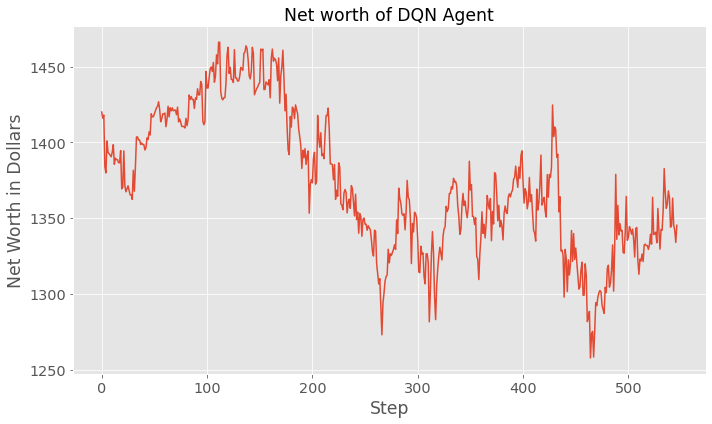

In [26]:
#Plot the networth
#dates = subset_data.index
plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(portfolio.performance.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent")
plt.show()

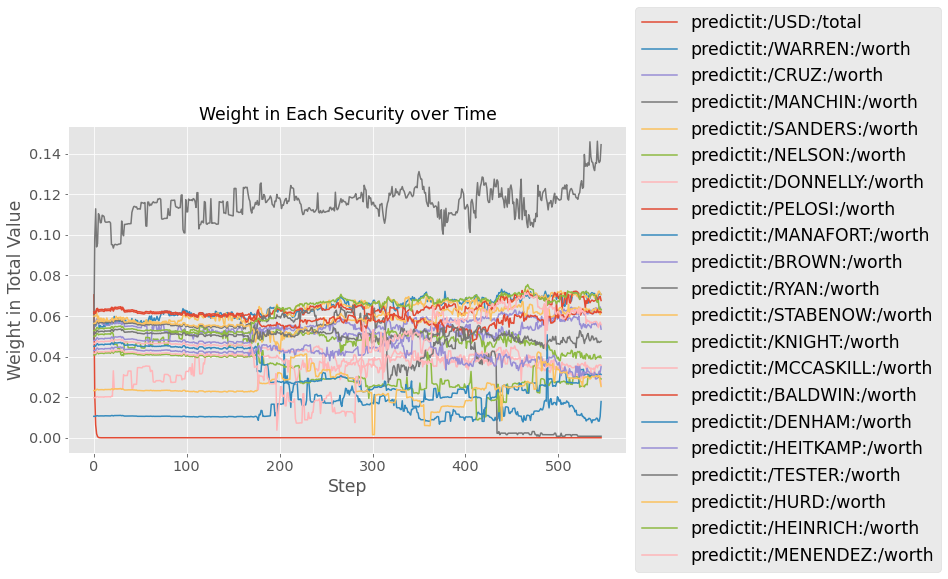

In [27]:
### Plot the total balance in each type of item
import seaborn as sns

ax = portfolio.weights.iloc[:,:].plot(figsize=(10, 6))
sns.set_palette(sns.color_palette('hls', 20))

plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

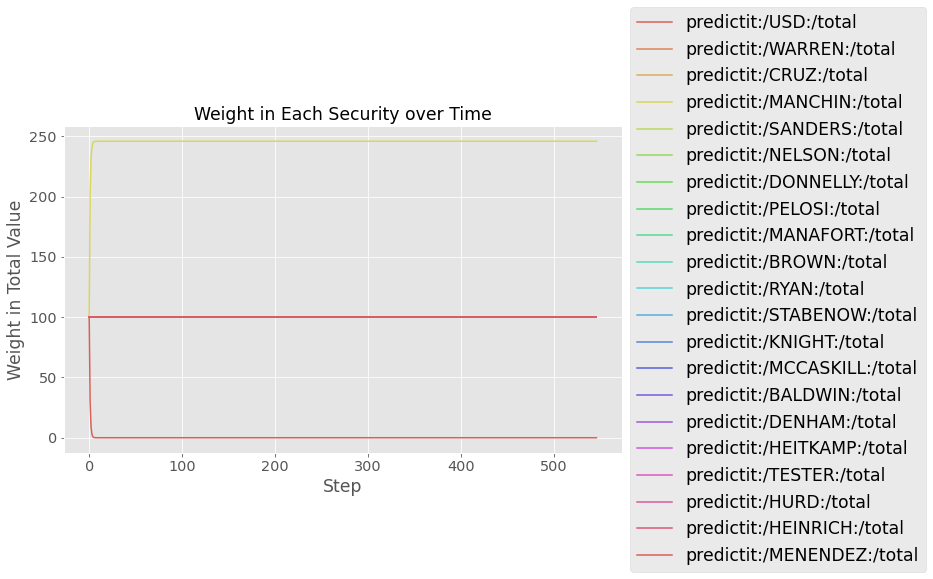

In [28]:
total_shares = portfolio.performance.loc[:, [("total" in name) for name in portfolio.performance.columns]]
total_shares.plot(figsize=(10, 6))

sns.set_palette(sns.color_palette('gist_rainbow', 20))

plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

## Extra Stuff

In [58]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
import matplotlib.pyplot as plt
#closing_prices = test_data.loc[:, [("price_norm" in name) for name in test_data.columns]]
my_data = all_data[(pd.to_datetime(all_data.index)>= '08-02-2018')]
my_data["MANAFORT:close"].plot()


In [ ]:
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [53]:
portfolio.performance[["predictit:/MANAFORT:/worth", "predictit:/MANAFORT:/total"]]

,predictit:/MANAFORT:/worth,predictit:/MANAFORT:/total
step,,
0,75.0,500
1,75.0,500
2,75.0,500
3,75.0,500
4,75.0,500
...,...,...
87,75.0,500
88,75.0,500
89,75.0,500
